#### Import required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
import re

#### Functions to be used

In [2]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sn.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

#### Import data

In [3]:
loans_df = pd.read_csv('/home/stush/Personal Projects/master/data/loans.csv')

In [4]:
#List the columns in the dataframe
loans_df.columns

Index(['ClientID', 'Loans', 'DefaultedLoans', 'NonPerformingLoans',
       'ClearedLoans', 'AvgLoanAmount', 'LastLoanAmount', 'LastLoanPeriod',
       'Lending', 'AvgLendingAmount', 'LastLendingAmount', 'LastLoanOn',
       'LastDefaultOn', 'Createdon', 'Defaulted >  10 Days',
       'LastDefault > 10 On', 'LastRepaymentOn', 'MaxLoanAmount',
       'LastDefault > 2on', 'Defaulted>2', 'CRBListed', 'LoanLimit', 'grade',
       'MobileLoansScore', 'Propability', 'avgMobiLoanPrincipalAmountmySector',
       'creditHistorymySector', 'creditHistoryotherSector',
       'lastMobiLoanPrincipalAmountmySector',
       'lastMobiLoanPrincipalAmountotherSector',
       'maxMobiLoanPrincipalAmountmySector',
       'maxMobiLoanPrincipalAmountotherSector', 'paAccountsmySector',
       'paAccountsotherSector', 'npaAccountsmySector',
       'npaAccountsotherSector', 'paAccountsWithDhmySector',
       'paAccountsWithDhotherSector', 'LastLoanOnYear', 'LastLoanOnMonth',
       'LastLoanOnWeek', 'LastLoanOnD

In [5]:
#Get the unique categories per column
for col_name in loans_df.columns:
        unique_cat = len(loans_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
            col_name=col_name,unique_cat=unique_cat))

Feature 'ClientID' has 9042 unique categories
Feature 'Loans' has 39 unique categories
Feature 'DefaultedLoans' has 14 unique categories
Feature 'NonPerformingLoans' has 3 unique categories
Feature 'ClearedLoans' has 41 unique categories
Feature 'AvgLoanAmount' has 2056 unique categories
Feature 'LastLoanAmount' has 35 unique categories
Feature 'LastLoanPeriod' has 3 unique categories
Feature 'Lending' has 54 unique categories
Feature 'AvgLendingAmount' has 158 unique categories
Feature 'LastLendingAmount' has 26 unique categories
Feature 'LastLoanOn' has 9042 unique categories
Feature 'LastDefaultOn' has 2 unique categories
Feature 'Createdon' has 9038 unique categories
Feature 'Defaulted >  10 Days' has 4 unique categories
Feature 'LastDefault > 10 On' has 2 unique categories
Feature 'LastRepaymentOn' has 9041 unique categories
Feature 'MaxLoanAmount' has 13 unique categories
Feature 'LastDefault > 2on' has 2 unique categories
Feature 'Defaulted>2' has 5 unique categories
Feature 'CR

### Loan Status Analytics

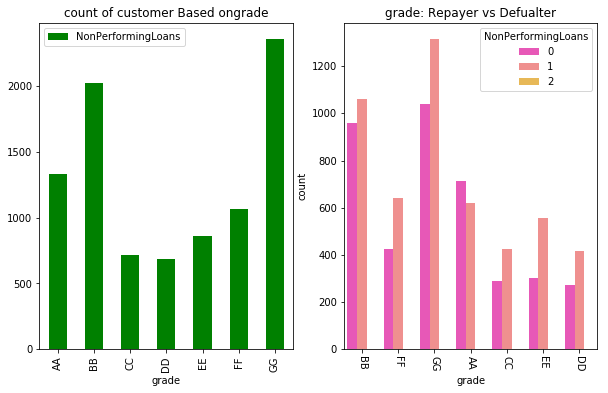

In [6]:
plot_re(loans_df,"grade","NonPerformingLoans")

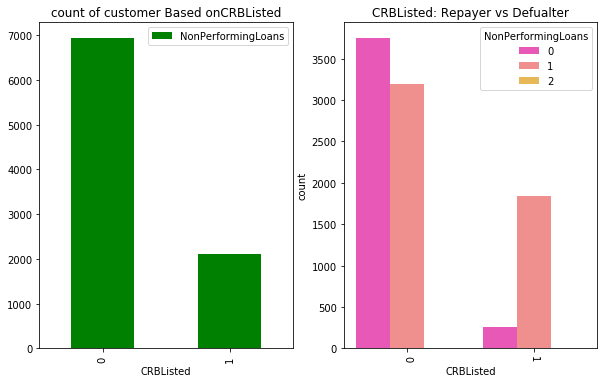

In [7]:
plot_re(loans_df,"CRBListed","NonPerformingLoans")

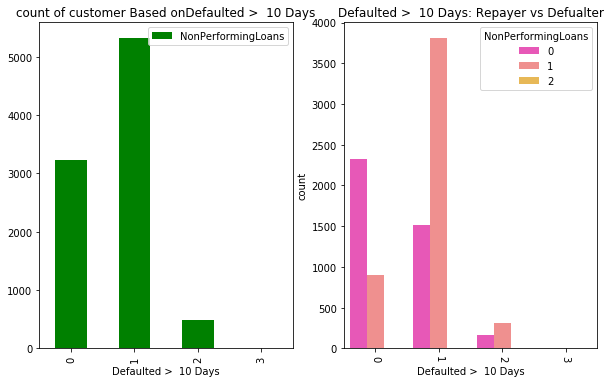

In [8]:
plot_re(loans_df,"Defaulted >  10 Days","NonPerformingLoans")

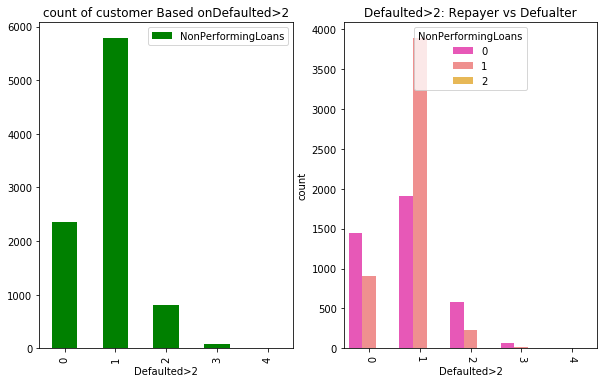

In [9]:
plot_re(loans_df,"Defaulted>2","NonPerformingLoans")

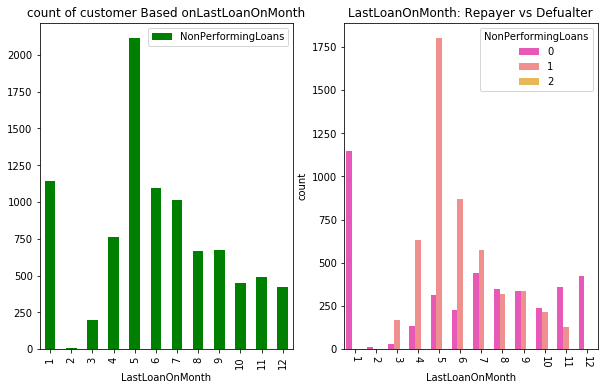

In [10]:
plot_re(loans_df,"LastLoanOnMonth","NonPerformingLoans")

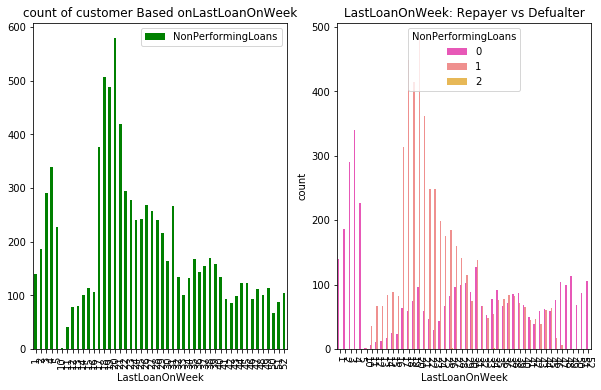

In [11]:
plot_re(loans_df,"LastLoanOnWeek","NonPerformingLoans")

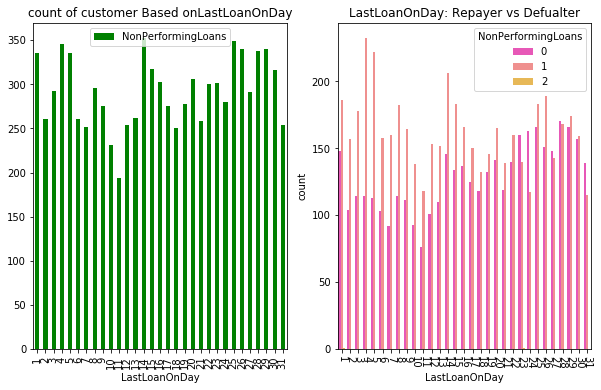

In [12]:
plot_re(loans_df,"LastLoanOnDay","NonPerformingLoans")

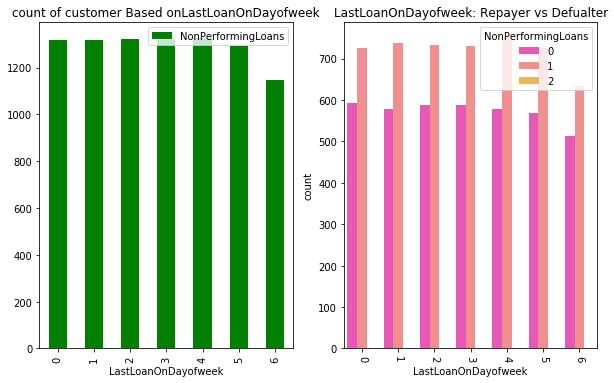

In [13]:
plot_re(loans_df,"LastLoanOnDayofweek","NonPerformingLoans")

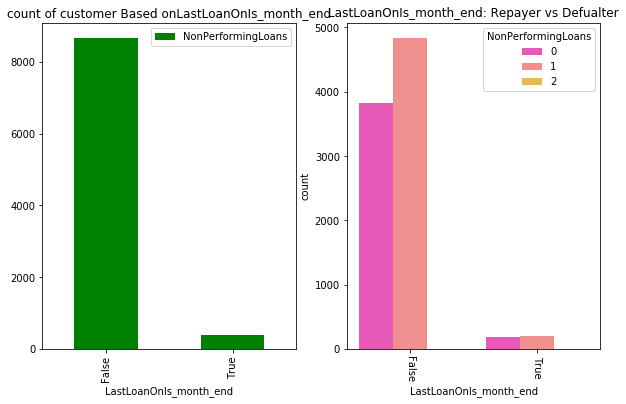

In [14]:
plot_re(loans_df,"LastLoanOnIs_month_end","NonPerformingLoans")

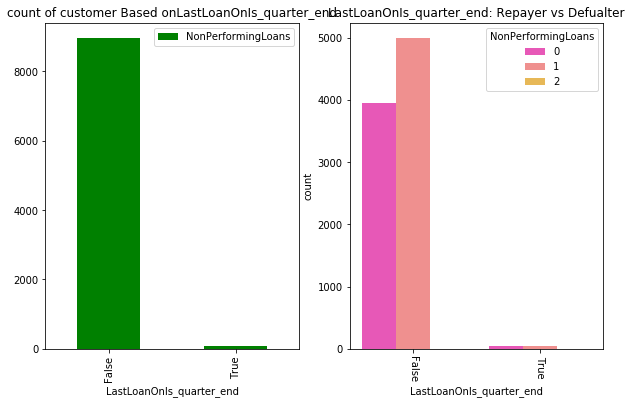

In [15]:
plot_re(loans_df,"LastLoanOnIs_quarter_end","NonPerformingLoans")

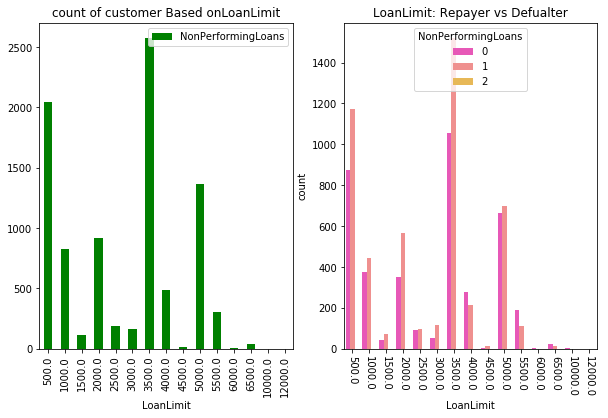

In [16]:
plot_re(loans_df,"LoanLimit","NonPerformingLoans")

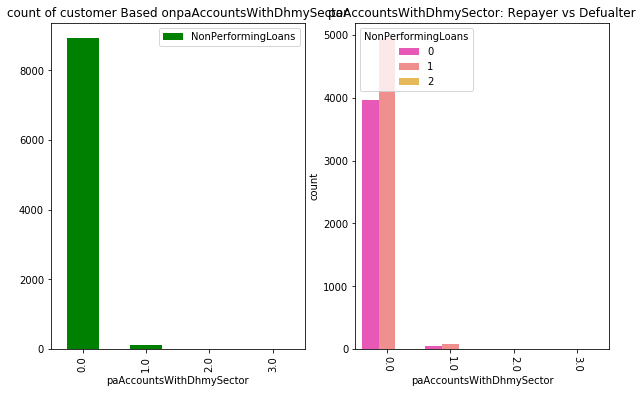

In [17]:
plot_re(loans_df,"paAccountsWithDhmySector","NonPerformingLoans")

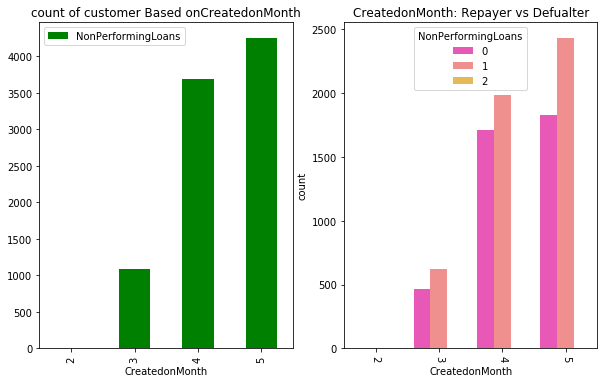

In [18]:
plot_re(loans_df,"CreatedonMonth","NonPerformingLoans")

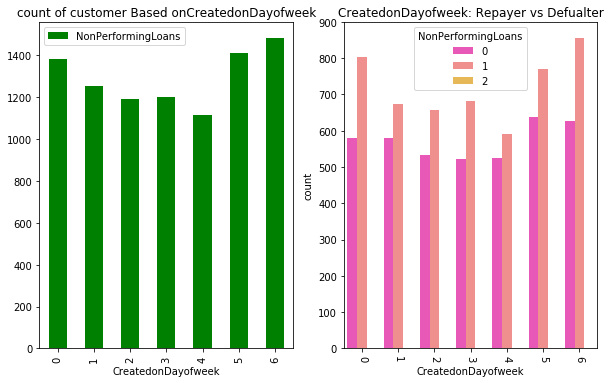

In [19]:
plot_re(loans_df,"CreatedonDayofweek","NonPerformingLoans")

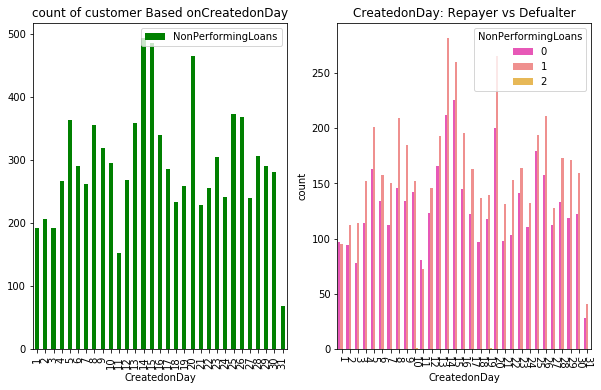

In [20]:
plot_re(loans_df,"CreatedonDay","NonPerformingLoans")

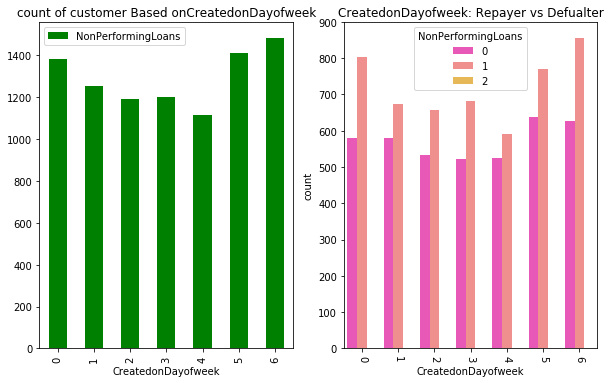

In [21]:
plot_re(loans_df,"CreatedonDayofweek","NonPerformingLoans")

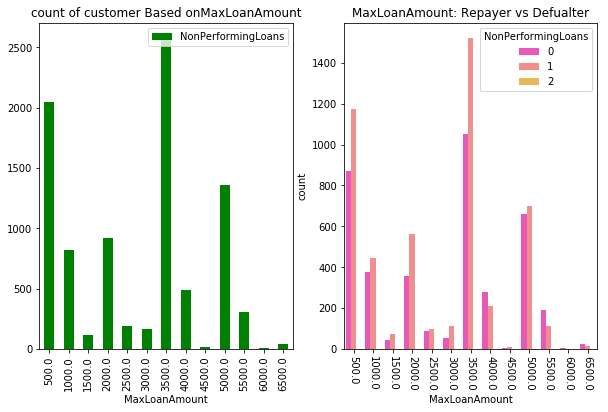

In [59]:
plot_re(loans_df,"MaxLoanAmount","NonPerformingLoans")

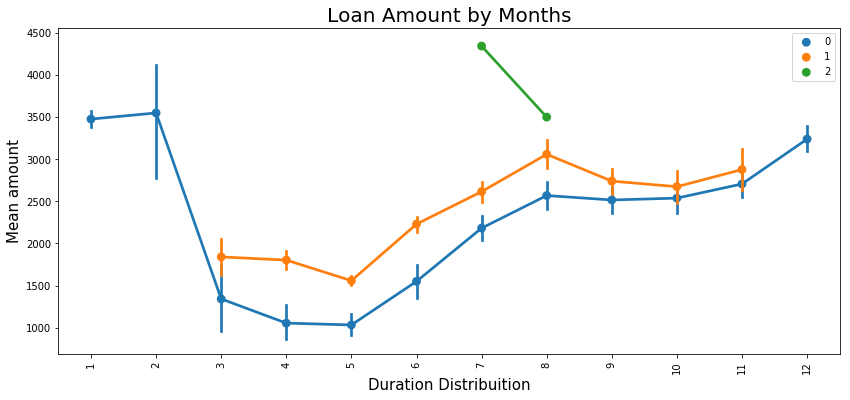

In [23]:
plt.figure(figsize = (14,6))

g = sn.pointplot(x='LastLoanOnMonth', y='AvgLoanAmount', 
                  data=loans_df, 
                  hue='NonPerformingLoans')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

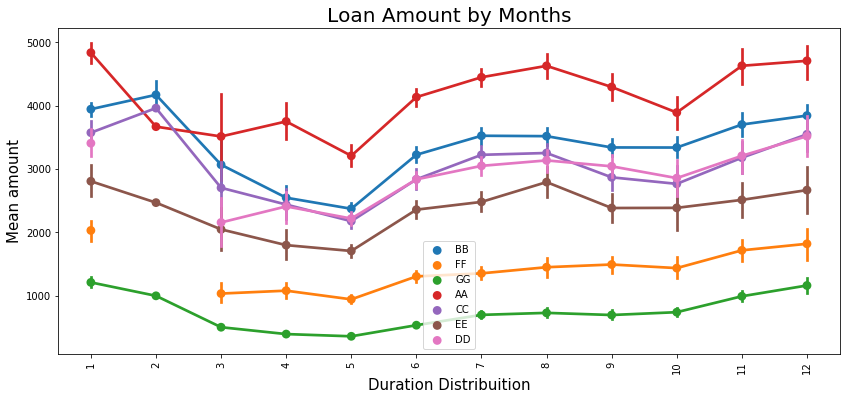

In [28]:
plt.figure(figsize = (14,6))

g = sn.pointplot(x='LastLoanOnMonth', y='AvgLoanAmount', 
                  data=loans_df, 
                  hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

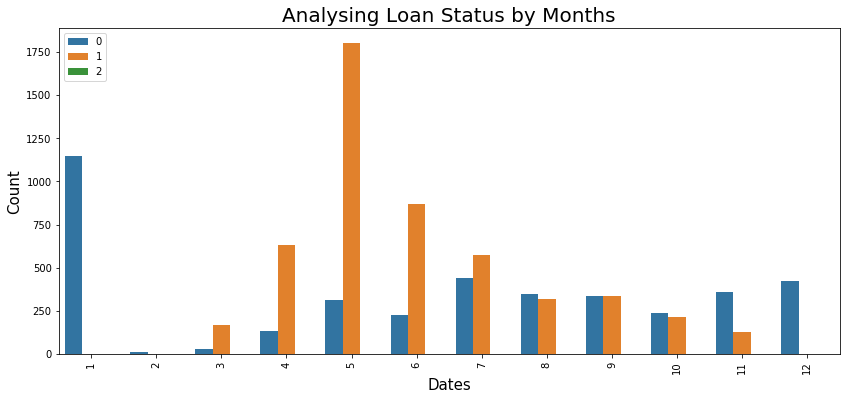

In [31]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sn.countplot(x='LastLoanOnMonth', data=loans_df,
                  hue='NonPerformingLoans')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Months", fontsize=20)
plt.show()

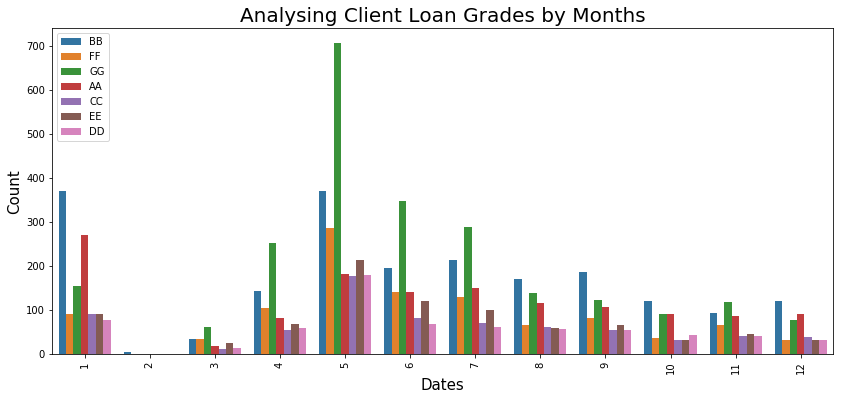

In [32]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sn.countplot(x='LastLoanOnMonth', data=loans_df,
                  hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Client Loan Grades by Months", fontsize=20)
plt.show()

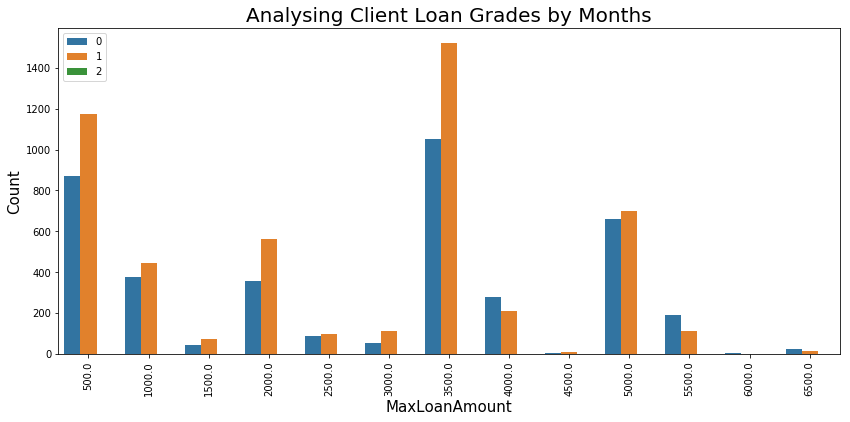

In [62]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sn.countplot(x='MaxLoanAmount', data=loans_df,
                  hue='NonPerformingLoans')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("MaxLoanAmount", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Client Loan Grades by Months", fontsize=20)
plt.show()

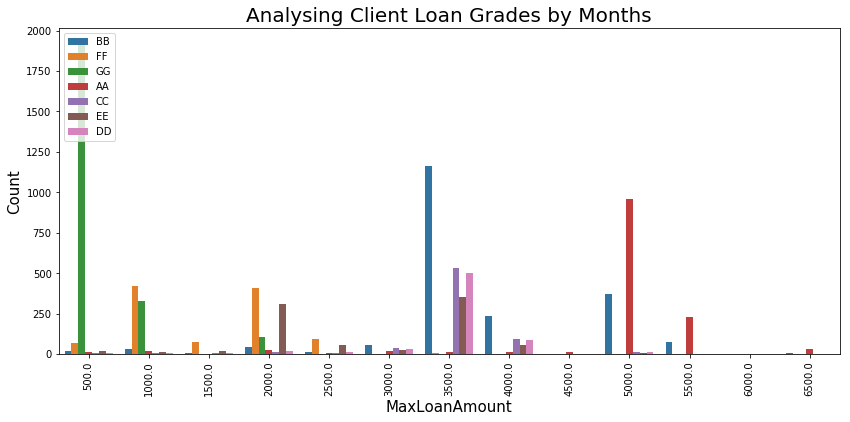

In [63]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sn.countplot(x='MaxLoanAmount', data=loans_df,
                  hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("MaxLoanAmount", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Client Loan Grades by Months", fontsize=20)
plt.show()

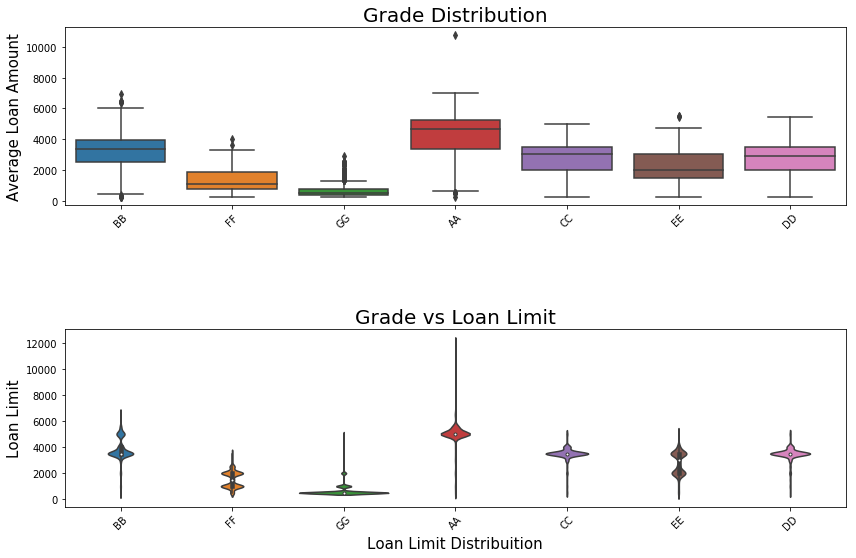

In [45]:
plt.figure(figsize = (14,14))

plt.subplot(311)
g1 = sn.boxplot(x="grade", y="AvgLoanAmount", data=loans_df)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Average Loan Amount", fontsize=15)
g1.set_title("Grade Distribution", fontsize=20)

plt.subplot(312)
g2 = sn.violinplot(x="grade", y="LoanLimit", data=loans_df)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Limit Distribuition", fontsize=15)
g2.set_ylabel("Loan Limit", fontsize=15)
g2.set_title("Grade vs Loan Limit", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

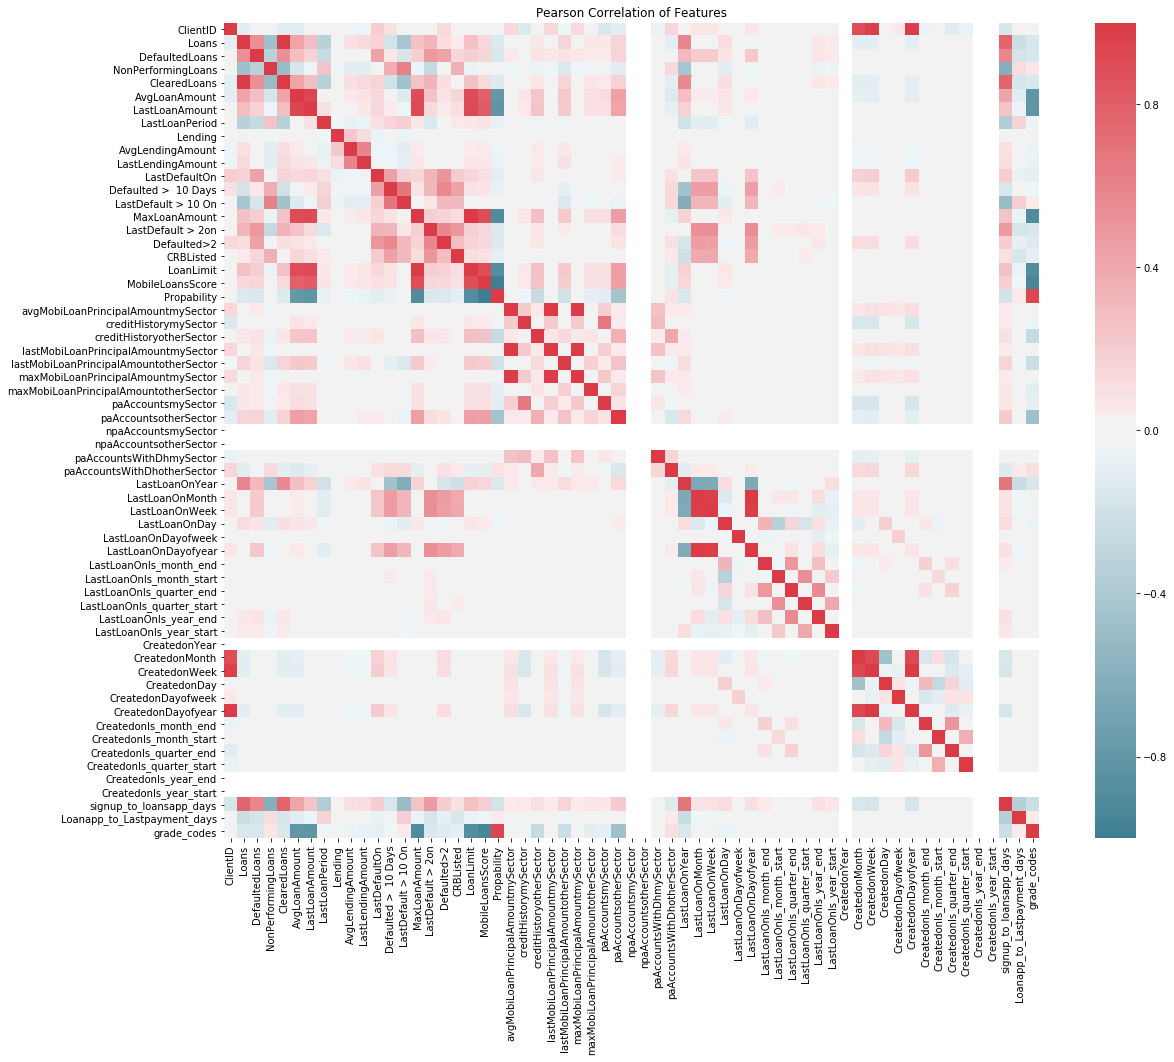

In [47]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20,15))
    colormap = sn.diverging_palette(220, 10, as_cmap = True)
    
    _ = sn.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        #cbar_kws={'shrink':.9 }, 
        #ax=ax,
        #annot=True, 
        #linewidths=0.1,vmax=1.0, linecolor='white',
        #annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features')

correlation_heatmap(loans_df)

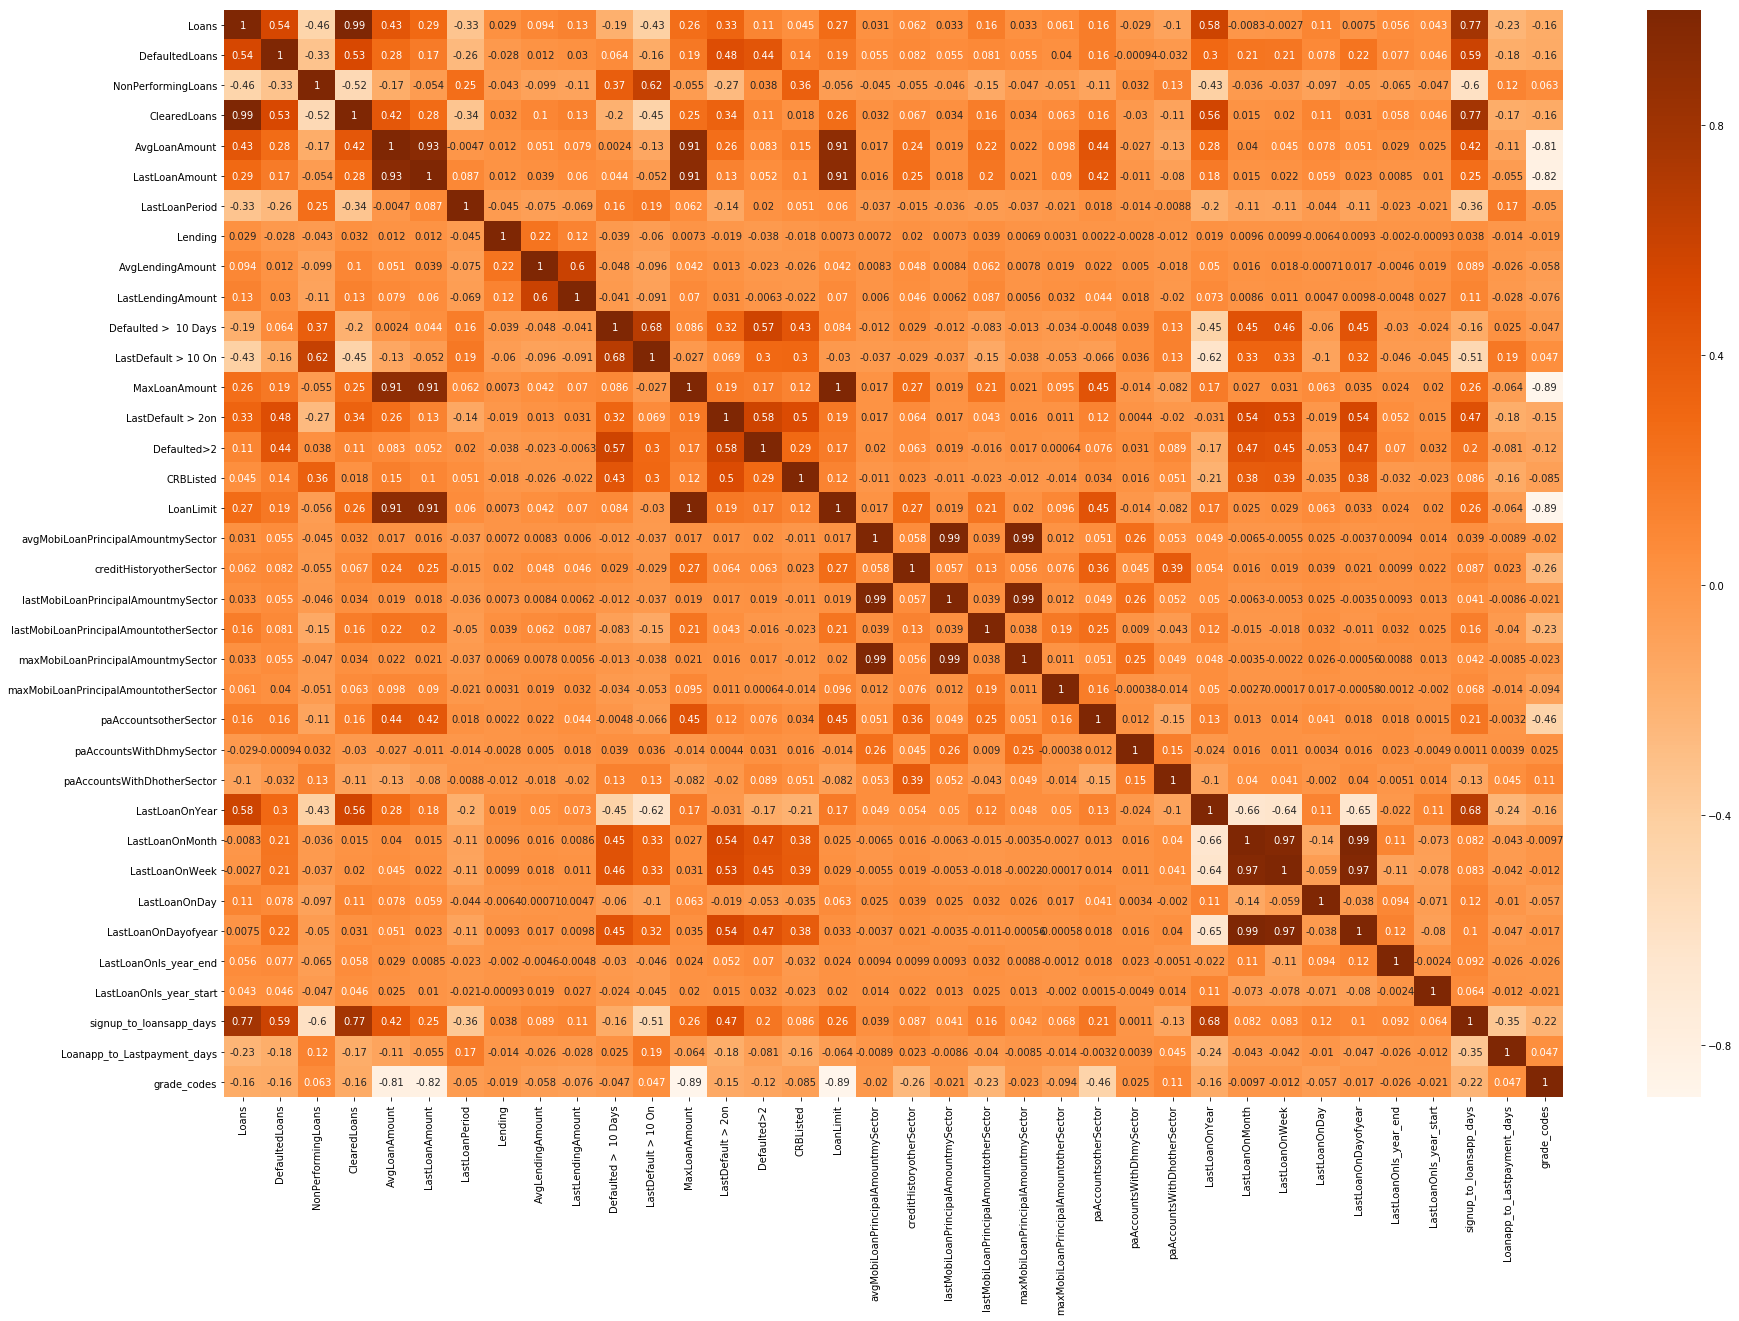

In [50]:
# most correlated features
corrmat = loans_df.corr()
top_corr_features = corrmat.index[abs(corrmat["NonPerformingLoans"])>=0.03]
plt.figure(figsize=(30,20))
g = sn.heatmap(loans_df[top_corr_features].corr(),annot=True,cmap="Oranges")

In [51]:
# Create correlation matrix
corr_matrix = loans_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [52]:
to_drop

['ClearedLoans',
 'LoanLimit',
 'Propability',
 'lastMobiLoanPrincipalAmountmySector',
 'maxMobiLoanPrincipalAmountmySector',
 'LastLoanOnWeek',
 'LastLoanOnDayofyear',
 'CreatedonWeek',
 'CreatedonDayofyear']

In [54]:
modelling_df = loans_df.drop(loans_df[to_drop], axis=1)

In [55]:
modelling_df.to_csv('/home/stush/Personal Projects/master/data/modelling_data.csv', index=False)

In [56]:
modelling_df.head()

,ClientID,Loans,DefaultedLoans,NonPerformingLoans,AvgLoanAmount,LastLoanAmount,LastLoanPeriod,Lending,AvgLendingAmount,LastLendingAmount,...,CreatedonDayofweek,CreatedonIs_month_end,CreatedonIs_month_start,CreatedonIs_quarter_end,CreatedonIs_quarter_start,CreatedonIs_year_end,CreatedonIs_year_start,signup_to_loansapp_days,Loanapp_to_Lastpayment_days,grade_codes
0,3391,2,2,1,1125.0000,2000.0,10,0,0.0,0.0,...,3,False,False,False,False,False,False,177,-46,1
1,3423,4,1,1,1250.0000,1500.0,30,0,0.0,0.0,...,3,False,False,False,False,False,False,46,-17,5
2,3442,7,1,0,1464.8437,2000.0,10,0,0.0,0.0,...,3,False,False,False,False,False,False,65,-20,6
3,3508,8,3,0,984.3750,1000.0,20,0,0.0,0.0,...,3,False,False,False,False,False,False,187,32,6
4,3759,4,1,0,500.0000,500.0,30,0,0.0,0.0,...,3,False,False,False,False,False,False,114,30,6
